# Project

Machine Learning

Winter 2023/24

by James Connolly (G00232918)

***

## Table of Contents

## Supervised Learning

* Explain Supervised Learning with and example
* Labelling datasets for algorithms
* Explain it benefits/ relevance / importance



# Iris Dataset

The Iris flower dataset can or also known as Fishers Iris dataset, made famous by the British statiscian and biologist Ronald Fisher in his 1936 paper. 

The Iris dataset consists of 50 samples from the following 3 sepcies Iris Setosa, Iris Virginia and Iris Versicolor. The 4 four features that were measured where the length and width of the sepals and the same for the petals.

The dataset has become a typical test for many statiscal classifcation and machine learning techniques which will be reviewed in this project. (Wikipedia Contributors)

# Data analysis of the Iris dataset

I will review the Iris dataset giving an overview of the key aspects and relationships between the variables with Python. I intend to give a comprehensice exploration of the dataset by reviewing the data, providing visualisation and statistical analysis.

In [7]:
# imports that I will be using to review the data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss

In [8]:
# import the Iris dataset for review

df = pd.read_csv("data/iris.csv")
print (df)

     sepal_length  sepal_width  petal_length  petal_width      class
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [9]:
# as per best practice when reviewing any dataset it is important to check for null values

print(df.isna().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [10]:
# check the data is accurate by pulling up the first 10 lines
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# check the last 10 lines
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [12]:
# get the data types and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# summary of the statistics from pandas
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From the overall results you can see each feature has 150 data points. 

Summary for each part of the Iris:

For the sepal length the approximate length is 5.84cms. The data point range is from a minimum of 4.3cms to maximum of 7.9 units. 50% of the data points in sepal length are less than or equal to the mean.

For the sepal width it is approximately 3.05cms. The data point range us from a minimum of 2cms to a maximum of 4.4cms. 50% of the data points here also are less than than or equal to the mean.

For the average petal length it is approximately 3.76 cms. The data points range is from a minimum of 1.0cms to a maximum of 6.9cms. 50% of the data have petal lengths less than or equal to 4.35cms.

For the average petal width is approximately 1.20cms. The data points range from a minimum of 0.1cms to a maximum of 2.5ms. 50% of the data have petal widths less than or equal to 1.3cms. These dimensions show that this part of the Iris of the flower is the smallest.

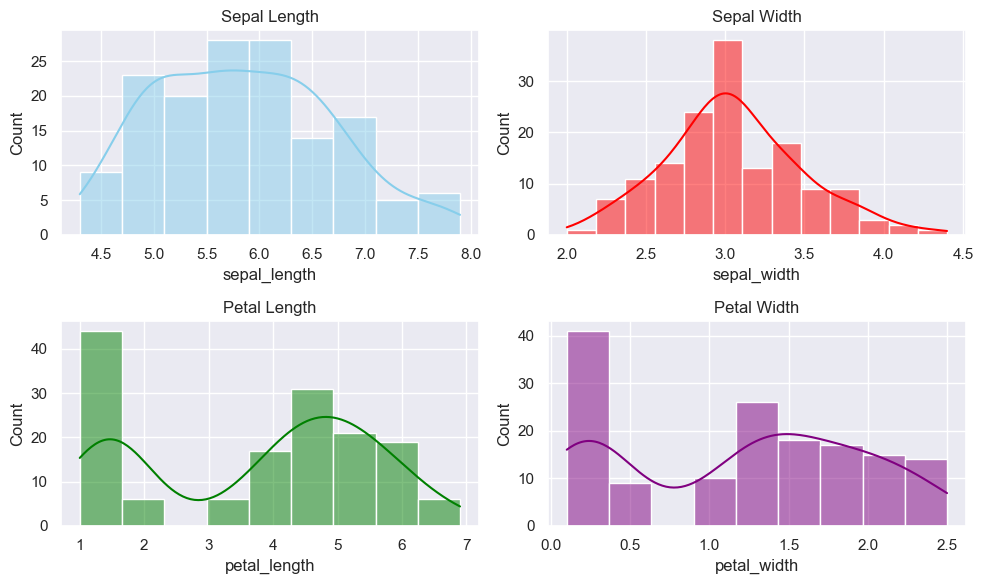

In [ ]:
# Visualising the Iris Dataset
# Histogram

# Create subplots for each feature
# reference for subplot - (“Matplotlib.pyplot.subplots — Matplotlib 3.6.0 Documentation”)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plotting each feature on its own subplot
# reference for hisplot - (Bell)
sns.histplot(df["sepal_length"], kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')

sns.histplot(df["sepal_width"], kde=True, color="red", ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')

sns.histplot(df["petal_length"], kde=True, color="green", ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')

sns.histplot(df["petal_width"], kde=True, color="purple", ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


		

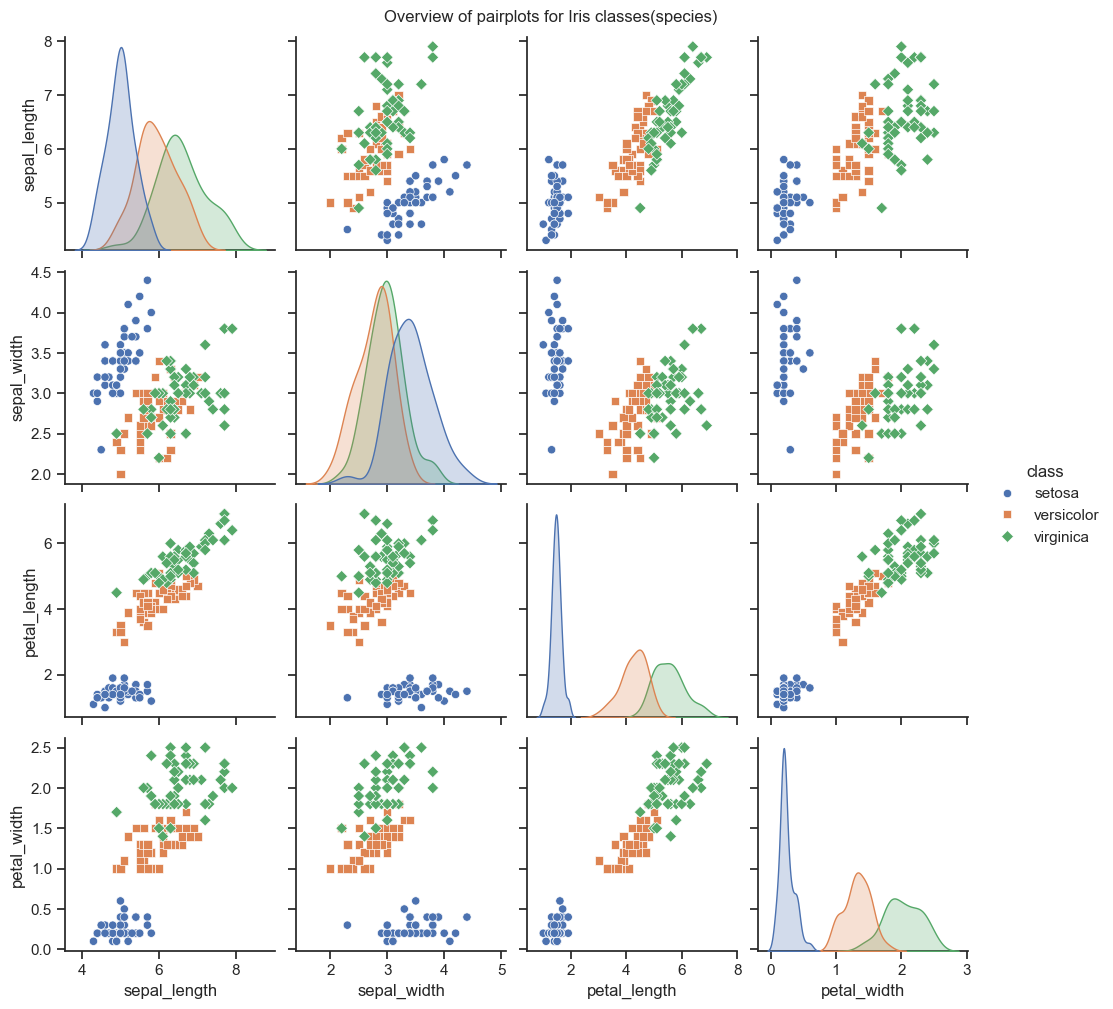

In [15]:
# Seaborn pairplot

# reference for pairplot - (“Seaborn.pairplot — Seaborn 0.10.1 Documentation”)
sns.set(style="ticks")
# reference for marker - (“Properties of Mark Objects — Seaborn 0.13.0 Documentation”)
g = sns.pairplot(df, hue="class", markers=["o", "s", "D"])

# Adding a header text
# (“Matplotlib.pyplot.text — Matplotlib 3.5.2 Documentation”)
plt.text(0.5, 1.0, "Overview of pairplots for Iris classes(species)", ha='center', va='center', transform=g.fig.transFigure)
plt.show()


This visualisation from the pairplot confirms the insights that I had summarised from the code describing the data. There is many different relationshups from the plots but the Setosa has the smallest sepal length but larger sepal widths. 

Text(0.5, 0.98, 'Heatmap of Iris Data Set Variables')

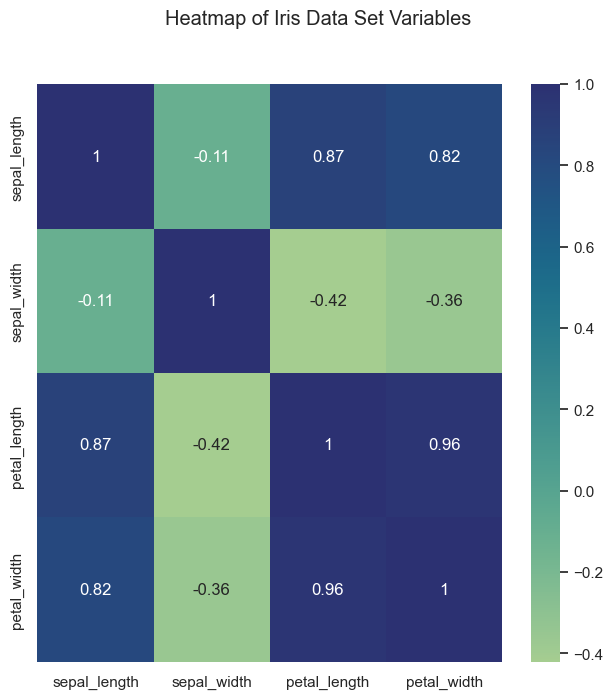

In [34]:
# Heatmap
# code reference - previous project
plt.figure(figsize=(7.5,7.5))
numeric_data = df.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), cmap='crest', annot=True)
plt.suptitle ("Iris Dataset Heatmap")

From the above graph, we can see that –

Petal width and petal length show a strong positive correlation (r = 0.96), indicating that as the petal width increases, the petal length tends to increase as well. This suggests that these two features tend to vary together consistently and are highly related.

Petal width and sepal length also display a moderate positive correlation (r = 0.82). This suggests that as the petal width increases, the sepal length tends to increase as well. 

The r-value is from the Pearson correlation cofficient which measures linear corraction. The rating is based on a number between -1 and 1, closer to 1 meaning ther is a strength in the relationship and -1, less strength.(Turney)



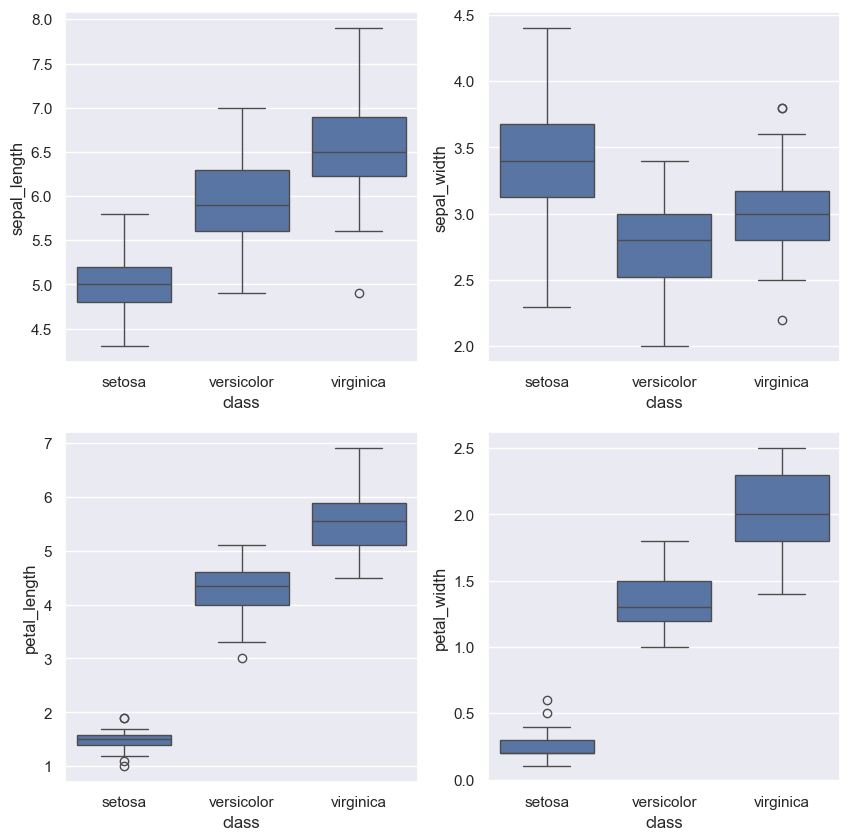

In [58]:
# boxplot
# reference for boxplot - (“Exploratory Data Analysis on Iris Dataset”)
def graph(y):
    sns.boxplot(x="class", y=y, data=df)
 
plt.figure(figsize=(10,10))
     
# grid position
plt.subplot(221)
graph('sepal_length')
 
plt.subplot(222)
graph('sepal_width')
 
plt.subplot(223)
graph('petal_length')
 
plt.subplot(224)
graph('petal_width')
 
plt.show()

From the boxplot it gives us the visualisation of where the outliers which are in the Setosa variable. You can see in Petal length and Petal Width boxplot. When using the classification algorithms I will have decide how I will deal with these when doing the calculations. 

# Classification Algorithms
* Define classification in machine learning and statistics
* Describe the algorithms and pick one going to be used with reasoning
* Give a real world example

# Implement chosen classification algorithm
* With scikit learn Python library

# Evaluation of Performance metrics
* Show results
* Comparison with other classiification algorithms


# Conclusion

# References
* Wikipedia Contributors. “Iris Flower Data Set.” Wikipedia, Wikimedia Foundation, 18 Apr. 2019, en.wikipedia.org/wiki/Iris_flower_data_set. Accessed 20 Oct. 2023.
* “Matplotlib.pyplot.subplots — Matplotlib 3.6.0 Documentation.” Matplotlib.org, matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html. Accessed 5 Nov. 2023.
* Bell, Veronica . Subplots for Seaborn Histogram and Displot. 5 May 2023, copyprogramming.com/howto/seaborn-histogram-displot-subplots. Accessed 5 Nov. 2023.
* “Seaborn.pairplot — Seaborn 0.10.1 Documentation.” Seaborn.pydata.org, seaborn.pydata.org/generated/seaborn.pairplot.html. Accessed 4 Nov. 2023.
* “Matplotlib.pyplot.text — Matplotlib 3.5.2 Documentation.” Matplotlib.org, matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html. Accessed 4 Nov. 2023.
* “Properties of Mark Objects — Seaborn 0.13.0 Documentation.” Seaborn.pydata.org, seaborn.pydata.org/tutorial/properties.html#marker. Accessed 5 Nov. 2023.
* “Exploratory Data Analysis on Iris Dataset.” GeeksforGeeks, 22 July 2021, www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/. Accessed 5 Nov. 2023.
* Turney, Shaun. “Pearson Correlation Coefficient (R) | Guide & Examples.” Scribbr, 13 May 2022, www.scribbr.com/statistics/pearson-correlation-coefficient/#:~:text=What%20is%20the%20definition%20of. Accessed 5 Nov. 2023.